In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
movies_data_path = os.path.join(os.path.pardir, 'data/processed_data.csv') 
movies_data = pd.read_csv(movies_data_path)

In [3]:
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'])
movies_data['day_of_year'] = movies_data['release_date'].dt.day_of_year
movies_data['day_of_year_sin'] = np.sin(2 * np.pi * movies_data['day_of_year'] / 365)
movies_data['day_of_year_cos'] = np.cos(2 * np.pi * movies_data['day_of_year'] / 365) 
movies_data['year'] = movies_data['release_date'].dt.year
movies_data['year'] = (movies_data['year'] - movies_data['year'].mean()) / movies_data['year'].std() 

In [4]:
movies_data.head()

,Unnamed: 0,index,budget,movieId,popularity,release_date,revenue,runtime,video,vote_average,...,mean_rating_by_main_character_2,max_rating_by_main_character_2,min_rating_by_main_character_2,mean_rating_by_prod_company,ratio_benefit,count,day_of_year,day_of_year_sin,day_of_year_cos,year
0,0,4025,0.216912,318,0.335964,2000-02-09,-0.174219,0.728011,-0.045235,0.146495,...,3.443951,0.553555,-0.583511,-0.918523,-0.092618,91082.0,40.0,0.635432,0.772157,0.337414
1,1,6399,11.243154,296,2.981965,2003-07-02,6.593328,0.388473,-0.045235,0.146495,...,2.686671,0.553555,-0.583511,-0.918523,-0.092617,87901.0,183.0,-0.008607,-0.999963,0.462114
2,2,3387,-0.242515,593,1.355923,1972-03-20,-0.174219,1.903336,-0.045235,1.081932,...,2.634840,0.553555,-0.583511,-0.918523,-0.092618,84078.0,80.0,0.981306,0.192452,-0.826452
3,3,940,-0.242515,260,0.490496,1935-06-01,-0.174219,-0.212249,-0.045235,0.926026,...,2.576529,0.553555,-0.583511,-0.918523,-0.092618,77045.0,152.0,0.501242,-0.865307,-2.364418
4,4,5011,-0.242515,480,1.283564,2001-08-30,-0.174219,0.519064,-0.045235,0.614213,...,1.196496,0.553555,-0.583511,-0.918523,-0.092618,74355.0,242.0,-0.854322,-0.519744,0.378981


In [5]:
movies_indices = movies_data['movieId'].to_numpy()

movies_data.drop(columns=['Unnamed: 0', 'index', 'movieId', 'release_date', 'day_of_year', 'count'], inplace=True)

A = movies_data.to_numpy()

In [6]:
path_ratings = os.path.join(os.path.pardir, 'data/ratings.csv')
ratings_df = pd.read_csv(path_ratings)

ratings = ratings_df['rating'].to_numpy()
movieId_of_rating = ratings_df['movieId'].to_numpy()

## <font color='red'> <div align='center'> I will first experiment with G-optimal design agent </font></div>

In [23]:
from utils import sample_k_movies
from MAB_class import MABAgent


# Let start with just 10 movies

k = 100
movies_id_k = movies_indices[:k]
mask = [i for i in range(movieId_of_rating.size) if movieId_of_rating[i] in movies_id_k]
movieId_of_rating_k = movieId_of_rating[mask]
ratings_k = ratings[mask]


A_10 = sample_k_movies(A, k=10)
delta = 0.2
epsilon = 0.1
n_rounds = 100
true_rewards = ratings_k
rewardsXmovie_indices = movieId_of_rating_k 
actionXmovie_indices = movies_id_k


Agent_Optimal = MABAgent(A_10, delta, epsilon, n_rounds, true_rewards, rewardsXmovie_indices, actionXmovie_indices)

In [24]:
cumulative_regret, theta = Agent_Optimal.run()

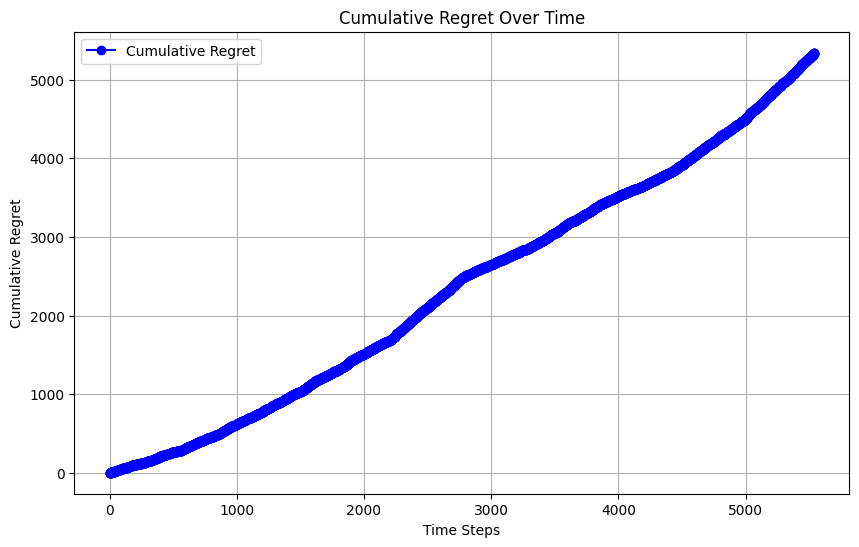

In [25]:
import matplotlib.pyplot as plt

time_steps = range(len(cumulative_regret))  # Assuming each entry corresponds to a time step

# Plotting  
plt.figure(figsize=(10, 6))
plt.plot(time_steps, cumulative_regret, marker='o', linestyle='-', color='b', label='Cumulative Regret')

# Customizing the plot
plt.title('Cumulative Regret Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()